In [6]:
#Import necessary libraries

import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

# Set the manual seed for random value generation
torch.manual_seed(0)

Function to plot a cubic function and the parameter values obtained via gradient descent.

In [47]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss.detach().numpy())
        parameter.append(w.state_dict()['linear.weight'][0].detach().numpy())
        loss.backward()
        optimizer.step()
    plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

Function to plot a 4th order function and the parameter values obtained via Gradient Descent. You can also add Gaussian noise with a standard deviation determined by the parameter <code>std</code>.

In [48]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss.detach().numpy())
        parameter.append(w.state_dict()['linear.weight'][0].detach().numpy())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [4]:
#Create a linear class

class one_param(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    super(one_param, self).__init__()
    self.linear = nn.Linear(input_size, output_size, bias = False)

  # Prediction
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

We create an object <code>w</code>, when we call the object with an input of one, it will behave like an individual parameter value. i.e <code>w(1)</code> is analogous to $w$ 

In [7]:
# Create a one_param object

w = one_param(1, 1)

### Saddle Points

Let's create a cubic function with Saddle points.

In [8]:
#Define a function to output a cubic

def cubic(yhat):
  out = yhat ** 3
  return out

Let's create an optimizer with no momentum term.

In [10]:
#Create a optimizer without momentum

optimizer = torch.optim.SGD(w.parameters(), lr = 0.01, momentum = 0)

We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the saddle point.

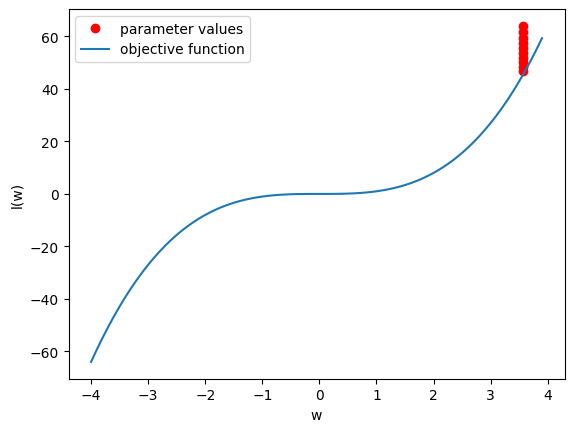

In [49]:
# Plot the model

plot_cubic(w, optimizer)

Create an optimizer with momentum of 0.9

In [41]:
#Create an optimizer with momentum

optimizer = torch.optim.SGD(w.parameters(), lr = 0.01, momentum = 0.9)

We run several iterations of stochastic gradient descent with momentum and plot the results. We see the parameter values do not get stuck in the saddle point.

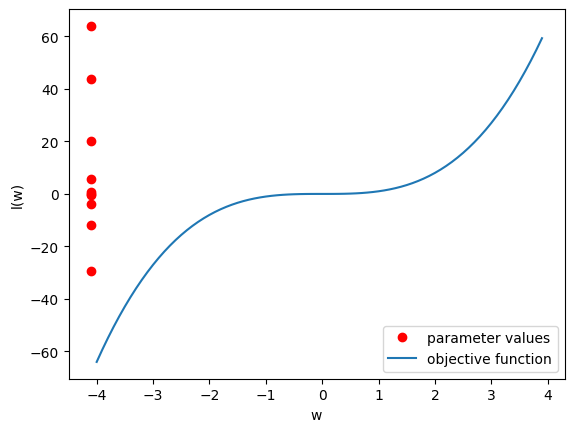

In [42]:
# Plot the model

plot_cubic(w, optimizer)

### Local Minima

Now, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2. We will then see how the momentum parameter affects convergence to a global minimum. The fourth order polynomial is given by:

In [43]:
# Create a function to calculate the fourth order polynomial 

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

We create an optimizer with no momentum term. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the local minimum.

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


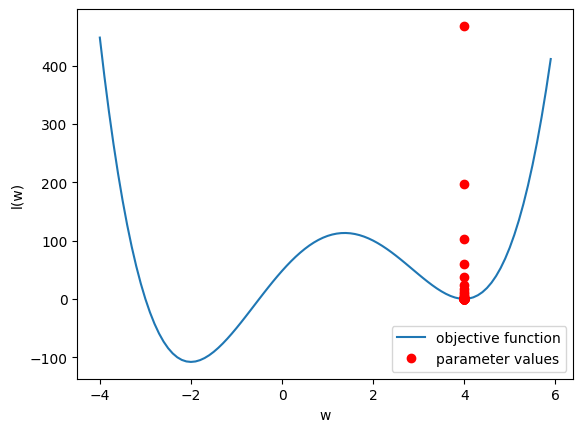

In [50]:
# Make the prediction without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


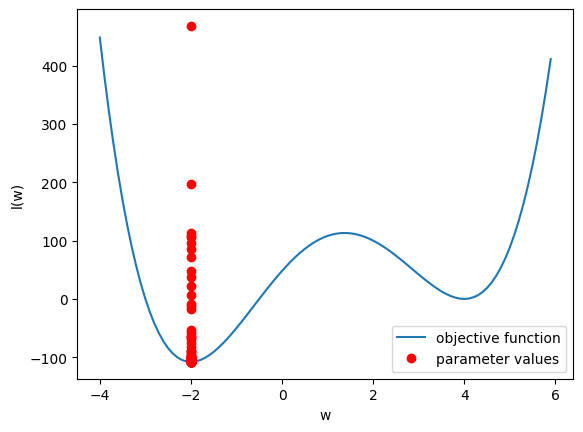

In [51]:
#Make the prediction with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

### Adding Noise

Now, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum. 


With no momentum, we get stuck at local minimum.

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


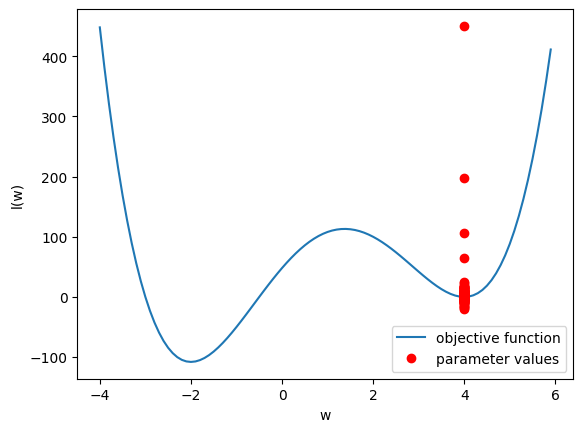

In [52]:
# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

But with momentum, we get to global minimum.

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


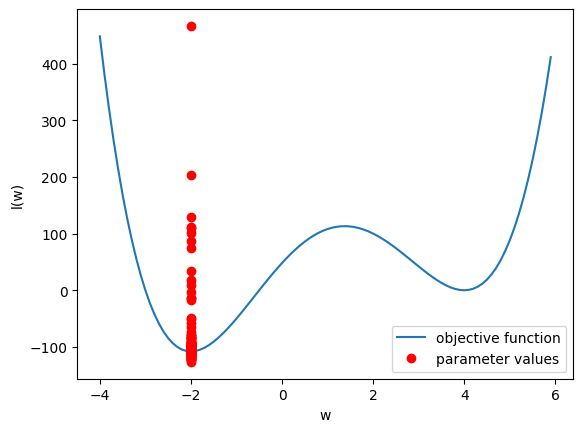

In [53]:
# Make the prediction with momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


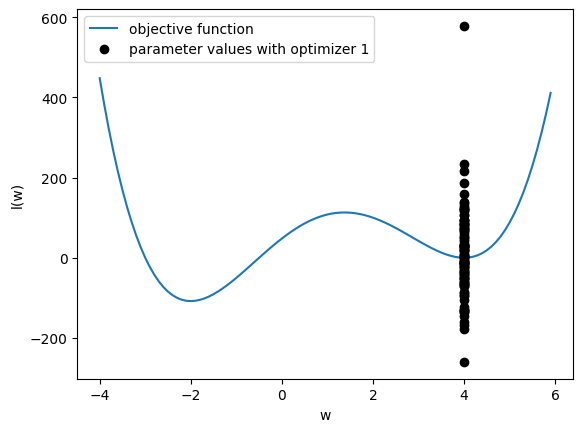

In [54]:
# EXAMPLE 1 # Without Momentum
optimizer1 = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer1, std = 100, color = 'black', paramlabel = 'parameter values with optimizer 1')

<ipython-input-48-3d60de4cdeb6>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.array(parameter).reshape(-1, 1), np.array(loss_list).reshape(-1, 1), 'ro',label=paramlabel, color=color)


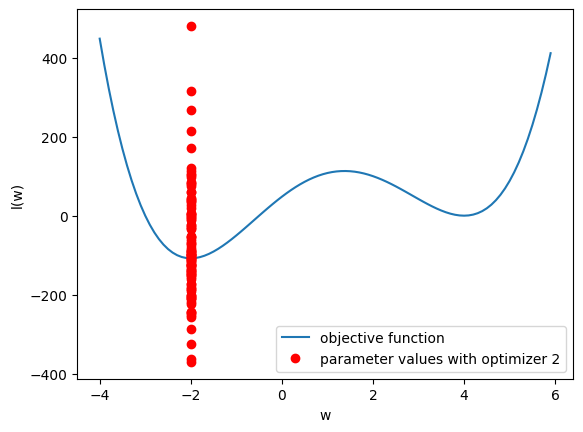

In [56]:
#Example 2 # With momentum
optimizer2 = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2')